# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
#Importing libraries
from scipy import stats;
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
import math

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean = 50, standard_deviation = 5 and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [3]:
# Variables
m = 50;
s = 5;
sample = [10, 50, 500, 5000]


normal_dist = [np.random.normal(m, s, size) for size in sample]
test_normal_dist = [stats.normaltest(dist) for dist in normal_dist]

test_normal_dist

[NormaltestResult(statistic=1.8277182757193384, pvalue=0.4009738210947452),
 NormaltestResult(statistic=0.02584222544363392, pvalue=0.98716200647253),
 NormaltestResult(statistic=1.933556331147516, pvalue=0.38030635048274664),
 NormaltestResult(statistic=1.7641679717903902, pvalue=0.4139194100192267)]

#### Interpret the normaltest results and make your observations.

`Comments:`
As pvalue in each case is higher than 0.05, we can't reject the hipotesis, so distribution is normal.

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](images/ch-1.png)

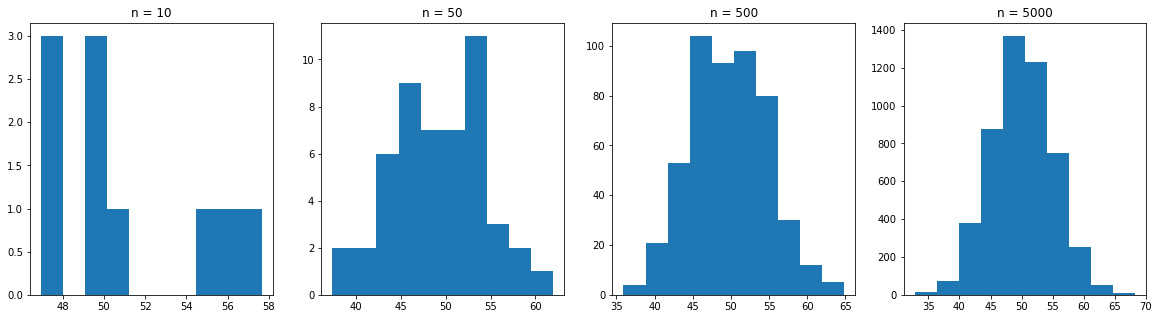

In [12]:
# Create figure and axes
fig, ax = plt.subplots(1, 4,figsize=(20,5))

# Variables
bins=10

# Plot each histogram
for i in range(len(normal_dist)):
    ax[i].hist(normal_dist[i], bins=bins)  
    ax[i].set_title(f"n = {sample[i]}")

plt.show()

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

`Comments:`
The bigger is the sample, the distribution is each time more normal. The mean of the samples will follow a normal distribution.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](images/ch-2.png)

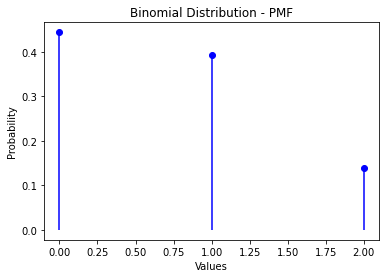

In [24]:
# Variables 
p = 0.15
n = 5

# Binomial distribution
# Plot line + bullet point -> Discrete Distribution Representation

binomial = stats.binom(n, p)
x = np.arange(stats.binom.ppf(0.01, n, p),stats.binom.ppf(0.99, n, p))
fmp = binomial.pmf(x)
plt.plot(x, fmp, 'bo')
plt.vlines(x, 0, fmp, colors='b')
plt.title('Binomial Distribution - PMF')
plt.xlabel('Values')
plt.ylabel('Probability')
plt.show();

#### Explain what you observe from the plot above.

`Comments:`
With more people watching videos, the probability of seeing an Ad is each time lower


#### Now plot PMP with 50, 500, and 5000 visitors.

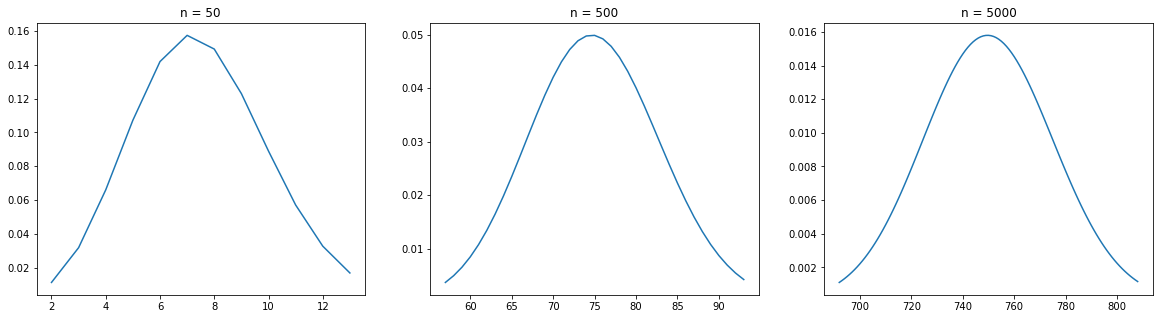

In [28]:
# Create figure and axes
fig, ax = plt.subplots(1, 3,figsize=(20,5))

# Variables
visitors = [50, 500, 5000]
x = [np.arange(stats.binom.ppf(0.01, n, p),stats.binom.ppf(0.99, n, p)) for n in visitors]

# Plot each PMF
# For visualization reasons, the next discrete distributions are represented using continuous lines

for i in range(len(x)):
    ax[i].plot(x[i], stats.binom.pmf(x[i], visitors[i], p))
    ax[i].set_title(f"n = {visitors[i]}")

plt.show()

#### What did you notice from the distribution plots? Comment your findings.

`Comments:`
The bigger is the sample, the distribution is each time more normal.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

`Comments:`<br/>
It estimates how many times an event can happen in a specified time. For calculting that, Poisson uses the average number of times it has happened.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [61]:
# Variables
mu = 300
visits = 320

# Probability
poisson_probability = stats.poisson.pmf(visits,mu)
print('The probability of getting 320 visitors in a day? is:', round(poisson_probability,3))

The probability of getting 320 visitors in a day? is: 0.012


#### What is the probability of getting 60 visits?

In [62]:
# Variables
visits = 60

# Probability
poisson_probability = stats.poisson.pmf(visits,mu)
print('The probability of getting 60 visitors in a day? is:', round(poisson_probability,3))

The probability of getting 60 visitors in a day? is: 0.0


#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](images/ch-3.png)

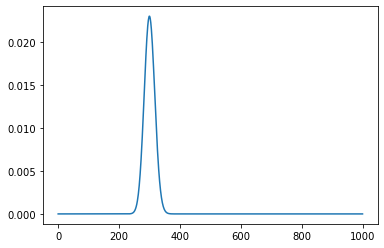

In [65]:
# Variables
visits = range(1000)

# Plot of the distribution
x = []
y= []

for i in range(1000):
    x.append(i)
    y.append(stats.distributions.poisson.pmf(i, mu))

plt.plot(x, y)
plt.show()

# Challenge 4 - Central Limit Theorem
#### Example of application

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

#### a. What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [38]:
# Variables
m = 35
s = 8

# Probability
in_30 = stats.norm.cdf(30, m, s)
in_35 = stats.norm.cdf(35, m, s)
in_30_35 = in_35 - in_30
print('The probability that the mean delivery time today is between 30 and 35 minutes is:', round(in_30_35,3))

The probability that the mean delivery time today is between 30 and 35 minutes is: 0.234


#### b. What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [43]:
# Variables
n=200
#transforming hours into minutes
total = 115*60

# Probability
in_total = stats.norm.cdf(total, m * n , s*(n**0.5))
print('The probability that in total, it takes more than 115 hours to deliver all 200 packages is:', round(1-in_total,3))
#we substract 1, otherwise it would be the probability to take less than 115 hours to deliver all 200 packages

The probability that in total, it takes more than 115 hours to deliver all 200 packages is: 0.812


# Challenge 5 - Normal Variables 

The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40. 

<div align="center">$X → N(200,40)$</div>

#### 1. Find the probability that the monthly sales are more than 300. 

In [46]:
# Variables
mu = 200
sigma = 40
monthly_sales = 300

# Probability
monthly_sales_300 = stats.norm.cdf(monthly_sales, mu, sigma)
print('The probability that the monthly sales are more than 300 is:', round(1-monthly_sales_300,3))

The probability that the monthly sales are more than 300 is: 0.006


#### 2. Find the probability that the monthly sales fall between 160 and 240.

In [49]:
# Probability
monthly_sales_160 = stats.norm.cdf(160, mu, sigma)
monthly_sales_240 = stats.norm.cdf(240, mu, sigma)
between_160_240 = monthly_sales_240 - monthly_sales_160
print('The probability that the monthly sales fall between 160 and 240 is:', round(between_160_240,3))

The probability that the monthly sales fall between 160 and 240 is: 0.683


#### 3. Find the probability that the monthly sales do not exceed 150.

In [50]:
# Probability
monthly_sales_150 = stats.norm.cdf(150, mu, sigma)
print('The probability that the monthly sales do not exceed 150 is:', round(monthly_sales_150,3))

The probability that the monthly sales do not exceed 150 is: 0.106


#### 4. Find the probability that the monthly sales exceed 3000. 

In [51]:
# Probability
monthly_sales_3000 = stats.norm.cdf(3000, mu, sigma)
print('The probability that the monthly sales exceed 3000 is:', round(1-monthly_sales_3000,3))

The probability that the monthly sales exceed 3000 is: 0.0


# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4. Find the following probabilities.
#### 1.The probability that in a particular month there is no violent robbery.

In [52]:
# Variables
mu = 4

# Probability
no_violent_robbery = stats.poisson.cdf(0, mu)
print('The probability that in a particular month there is no violent robbery is:', round(no_violent_robbery,3))

The probability that in a particular month there is no violent robbery is: 0.018


#### 2. The probability that there are at least 1 in a given month. 

In [54]:
# Probability
violent_robbery = stats.poisson.cdf(1, mu)
print('The probability that there are at least 1 in a given month is:', round(violent_robbery,3))

The probability that there are at least 1 in a given month is: 0.092


#### 3. The probability that there are between 2 and 6 (inclusive) in a given month.

In [55]:
# Probability
violent_2 = stats.poisson.cdf(2, mu)
violent_6 = stats.poisson.cdf(6, mu)
between_2_6 = violent_6 - violent_2 
print('The probability that there are between 2 and 6 is:', round(between_2_6,3))

The probability that there are between 2 and 6 is: 0.651


#### 4. The probability that there more than two in 15 days.  

In [58]:
# Probability
#First we need to calculate the mean divided into 2, as the inticial mean is per month
mu2 = mu/2

robberies_2in15days= stats.poisson.cdf(2, mu2)
print('The probability that there more than two in 15 days is', round(1-robberies_2in15days,3))

The probability that there more than two in 15 days is 0.323
